Regression weight w1 (area): 9.9609375
Regression weight w2 (floor): -15.625
Bias term b: 137.5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


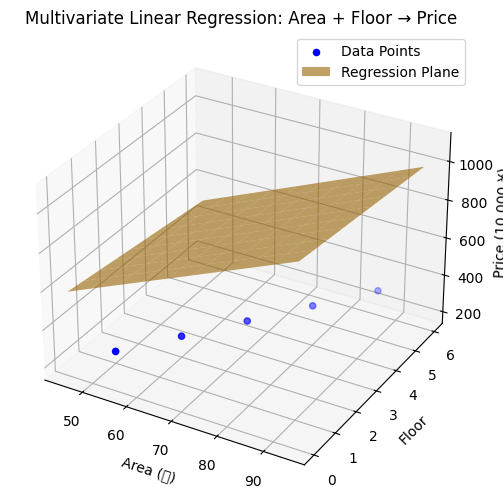

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Construct sample data (area, floor) → price
x1 = np.array([50, 60, 70, 80, 90])     # area
x2 = np.array([1, 2, 3, 4, 5])          # floor
y = np.array([200, 250, 300, 350, 400]) # price

n = len(x1)

# 2. Construct input matrix X: each row is [x1, x2, 1] for bias term
X = np.column_stack((x1, x2, np.ones(n)))  # n × (d+1)
Y = y.reshape(-1, 1)                       # n × 1

# 3. Solve with normal equation: w = (X^T X)^(-1) X^T y
w = np.linalg.inv(X.T @ X) @ X.T @ Y      # (3 × 1)

# 4. Output results
print("Regression weight w1 (area):", w[0][0])
print("Regression weight w2 (floor):", w[1][0])
print("Bias term b:", w[2][0])

# 5. Plotting (3D scatter + regression plane)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Original data points
ax.scatter(x1, x2, y, c='blue', label='Data Points')

# Create regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(45, 95, 10), np.linspace(0, 6, 10))
y_pred_grid = w[0][0] * x1_grid + w[1][0] * x2_grid + w[2][0]

# Plot regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6, label='Regression Plane')

# Set labels
ax.set_xlabel('Area (㎡)')
ax.set_ylabel('Floor')
ax.set_zlabel('Price (10,000 ¥)')
ax.set_title('Multivariate Linear Regression: Area + Floor → Price')

plt.legend()
plt.show()


In [16]:
import numpy as np

# 1. Redesigned feature data: area (㎡), floor number, building age (years), number of bedrooms
X_raw = np.array([
    [50,  3, 20, 2],
    [65,  2, 15, 3],
    [80,  5, 10, 4],
    [55,  4,  7, 2],
    [90,  1,  3, 5]
])

# 2. Corresponding house price labels (example only, in ten-thousands CNY)
y = np.array([210, 265, 325, 255, 480]).reshape(-1, 1)

# 3. Add bias term (constant column of 1)
n_samples = X_raw.shape[0]
X = np.hstack([X_raw, np.ones((n_samples, 1))])  # (5 × 5) matrix

# 4. Verify rank of X (should be 5)
rank_X = np.linalg.matrix_rank(X)
print(f"Rank of X: {rank_X} (should be 5)")

# 5. Solve for weights using the normal equation
w = np.linalg.inv(X.T @ X) @ X.T @ y

# 6. Output coefficients
feature_names = ["Area (㎡)", "Floor", "Age (years)", "Bedrooms", "Bias"]
for name, coef in zip(feature_names, w.flatten()):
    print(f"Weight for {name}: {coef:.4f}")

# 7. Single prediction example (75㎡, 3rd floor, 8 years old, 3 bedrooms)
x_new = np.array([75, 3, 8, 3, 1])
y_pred = x_new @ w
print(f"\nPredicted price (75㎡, 3rd floor, 8 years, 3 bedrooms): {y_pred[0]:.2f} ten-thousands CNY")


Rank of X: 5 (should be 5)
Weight for Area (㎡): -16.8167
Weight for Floor: 1.2500
Weight for Age (years): -9.8333
Weight for Bedrooms: 259.3333
Weight for Bias: 725.0833

Predicted price (75㎡, 3rd floor, 8 years, 3 bedrooms): 166.92 ten-thousands CNY
